## Q1.Write a python program to import and export data using Pandas library functions.

In [3]:
# Import pandas library
import pandas as pd

# -------------------------------
# 1. IMPORT DATA
# -------------------------------

# Load dataset from CSV file
# (Assume your dataset is saved as "students.csv")
df = pd.read_csv("data.csv", sep=";")

# Display first 5 rows
print("First 5 rows of dataset:")
print(df.head())

# Display dataset information
print("\nDataset Info:")
print(df.info())

# -------------------------------
# 2. DATA PROCESSING (Example)
# -------------------------------

# Example: Filter students who Graduated
graduates = df[df["Target"] == "Graduate"]

# Example: Filter students who Dropped out
dropouts = df[df["Target"] == "Dropout"]

print("\nNumber of Graduates:", len(graduates))
print("Number of Dropouts:", len(dropouts))

# -------------------------------
# 3. EXPORT DATA
# -------------------------------

# Export graduates to new CSV file
graduates.to_csv("graduates_output.csv", index=False)

# Export dropouts to new CSV file
dropouts.to_csv("dropouts_output.csv", index=False)

print("\nData successfully exported!")

First 5 rows of dataset:
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2

## #Q2.Demonstrate various data pre-processing techniques for a given dataset.

In [4]:

# Import necessary libraries
import pandas as pd
import numpy as np

# -------------------------------
# 1. LOAD DATA
# -------------------------------
# Assume your dataset is saved as "students.csv"
df = pd.read_csv("data.csv", sep=";")

print("Original Data Shape:", df.shape)
print(df.head())

# -------------------------------
# 2. HANDLE MISSING VALUES
# -------------------------------

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill numeric missing values with mean
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nAfter handling missing values:")
print(df.isnull().sum())

# -------------------------------
# 3. ENCODING CATEGORICAL DATA
# -------------------------------

# Example: Encode 'Target' column (Graduate=1, Dropout=0, Enrolled=2)
df['Target_encoded'] = df['Target'].map({'Dropout':0, 'Graduate':1, 'Enrolled':2})

# Convert other categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Nacionality'], drop_first=True)

print("\nColumns after encoding:")
print(df_encoded.columns)

# -------------------------------
# 4. FEATURE SCALING
# -------------------------------

from sklearn.preprocessing import StandardScaler

# Select numeric columns for scaling
cols_to_scale = ['Age at enrollment', 'Admission grade', 'GDP', 'Inflation rate', 'Unemployment rate']

scaler = StandardScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

print("\nSample of scaled features:")
print(df_encoded[cols_to_scale].head())

# -------------------------------
# 5. HANDLING OUTLIERS (Optional)
# -------------------------------

# Example: Remove rows where 'Admission grade' > 3 standard deviations from mean
df_encoded = df_encoded[np.abs(df_encoded['Admission grade']) <= 3]

# -------------------------------
# 6. SPLITTING DATA (Optional)
# -------------------------------
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Target', 'Target_encoded'], axis=1)
y = df_encoded['Target_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Original Data Shape: (4424, 37)
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                      

## Q3.Implement Dimensionality reduction using Principle ComponentAnalysis (PCA) method.


Explained variance ratio: [0.17666395 0.0988699 ]

PCA components head:
        PC1       PC2  Target
0 -6.101294 -0.296791       0
1 -0.254507 -1.106861       1
2 -3.954380  0.446635       0
3  0.421885 -0.958326       1
4  0.405696  2.791055       1


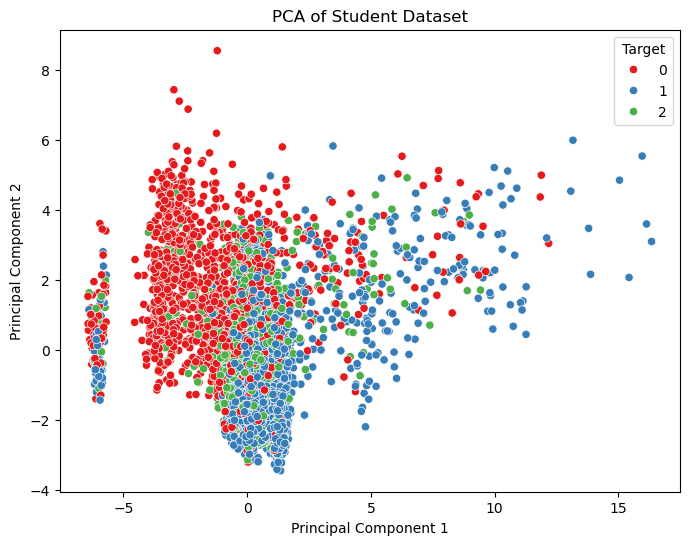

In [5]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# -------------------------------
# 1. LOAD DATA
# -------------------------------
df = pd.read_csv("data.csv", sep=";")

# -------------------------------
# 2. PREPROCESS DATA
# -------------------------------

# Fill numeric missing values with mean
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Encode categorical target
df['Target_encoded'] = df['Target'].map({'Dropout':0, 'Graduate':1, 'Enrolled':2})

# Drop original categorical target and non-numeric columns for PCA
df_features = df.drop(['Target', 'Target_encoded'], axis=1)

# One-hot encode categorical features if any remain
df_features = pd.get_dummies(df_features, drop_first=True)

# -------------------------------
# 3. FEATURE SCALING
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# -------------------------------
# 4. APPLY PCA
# -------------------------------
# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame of PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = df['Target_encoded']

print("\nExplained variance ratio:", pca.explained_variance_ratio_)
print("\nPCA components head:")
print(df_pca.head())

# -------------------------------
# 5. VISUALIZATION
# -------------------------------
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Target', palette='Set1')
plt.title("PCA of Student Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## Q4.Write a Python program to demonstrate various Data Visualization Techniques.

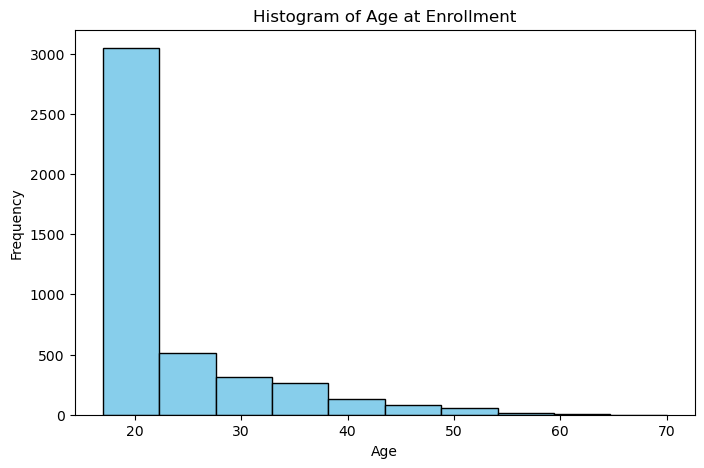

C:\Users\raiga\AppData\Local\Temp\ipykernel_8244\2998073397.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Target', palette='Set2')


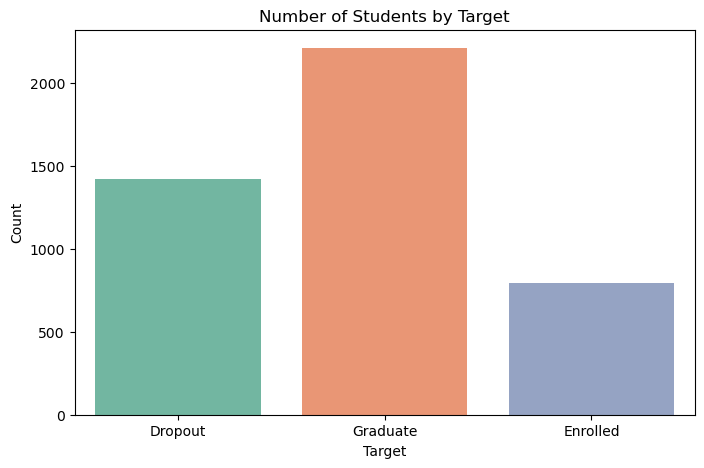

C:\Users\raiga\AppData\Local\Temp\ipykernel_8244\2998073397.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target', y='Admission grade', palette='Pastel1')


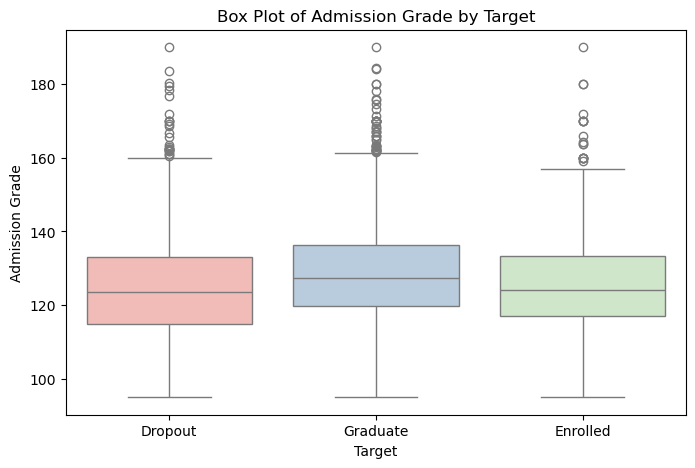

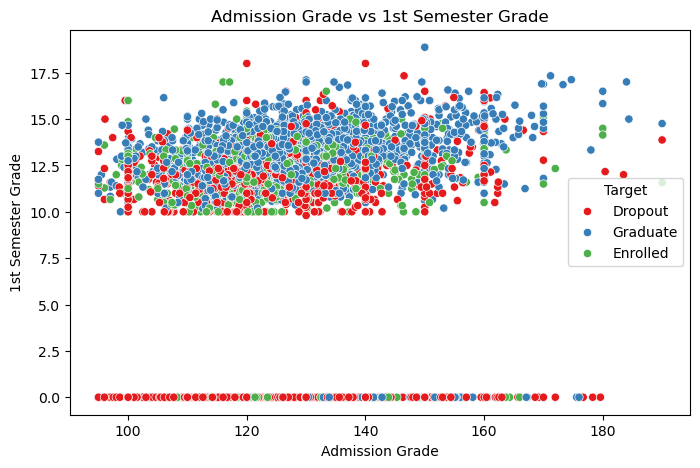

C:\Users\raiga\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\raiga\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


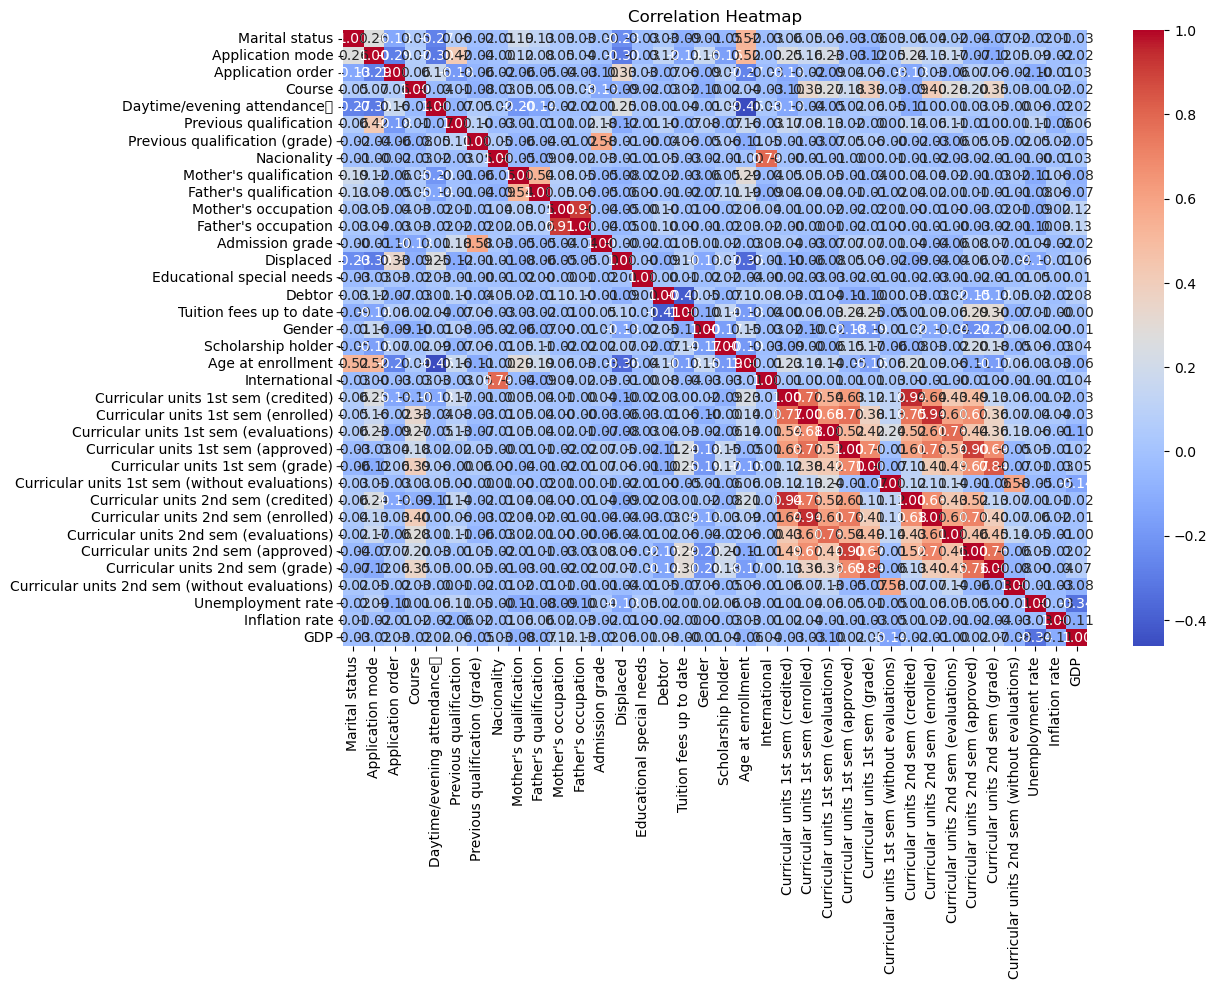

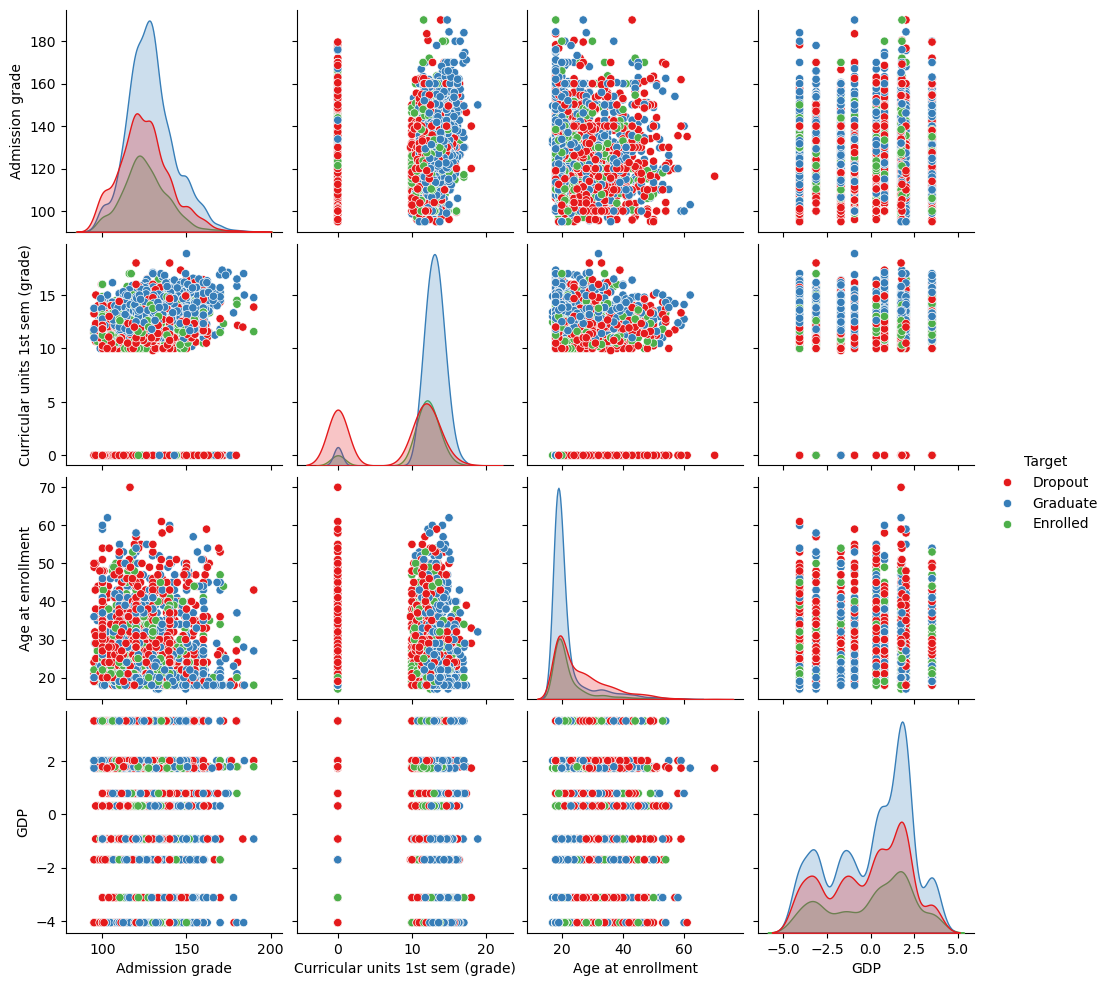

In [7]:

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. LOAD DATA
# -------------------------------
df = pd.read_csv("data.csv", sep=";")

# -------------------------------
# 2. PREPROCESS DATA (Optional)
# -------------------------------
# Fill missing values for numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Encode target for visualization
df['Target_encoded'] = df['Target'].map({'Dropout':0, 'Graduate':1, 'Enrolled':2})

# -------------------------------
# 3. HISTOGRAM
# -------------------------------
plt.figure(figsize=(8,5))
plt.hist(df['Age at enrollment'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Age at Enrollment")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# -------------------------------
# 4. BAR PLOT
# -------------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Target', palette='Set2')
plt.title("Number of Students by Target")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 5. BOX PLOT
# -------------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Target', y='Admission grade', palette='Pastel1')
plt.title("Box Plot of Admission Grade by Target")
plt.xlabel("Target")
plt.ylabel("Admission Grade")
plt.show()

# -------------------------------
# 6. SCATTER PLOT
# -------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Admission grade', y='Curricular units 1st sem (grade)', hue='Target', palette='Set1')
plt.title("Admission Grade vs 1st Semester Grade")
plt.xlabel("Admission Grade")
plt.ylabel("1st Semester Grade")
plt.show()

# -------------------------------
# 7. CORRELATION HEATMAP
# -------------------------------
plt.figure(figsize=(12,8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# 8. PAIR PLOT
# -------------------------------
# Select few numeric columns for pair plot
cols_to_plot = ['Admission grade', 'Curricular units 1st sem (grade)', 'Age at enrollment', 'GDP']
sns.pairplot(df[cols_to_plot + ['Target']], hue='Target', palette='Set1', diag_kind='kde')
plt.show()

## Q5.Implement Simple and Multiple Linear Regression Models.

Simple Linear Regression:
Slope: 0.026214025841819165
Intercept: 7.301087490554048
R^2 Score: 0.0024152587890665655
Mean Squared Error: 23.204880176648626


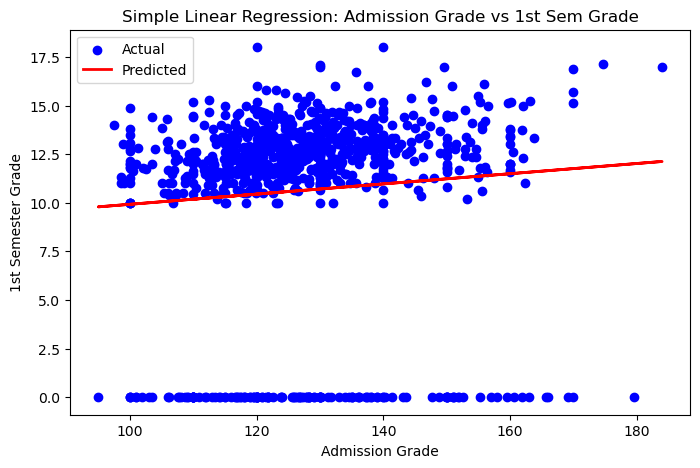


Multiple Linear Regression:
Coefficients: {'Admission grade': np.float64(0.024425877096034464), 'Age at enrollment': np.float64(-0.09697761722642596), 'GDP': np.float64(0.11498038164023856), 'Inflation rate': np.float64(-0.08750820567688929), 'Unemployment rate': np.float64(0.06417951248467295)}
Intercept: 9.143225020725456
R^2 Score: 0.03263629346392316
Mean Squared Error: 22.501906825639733


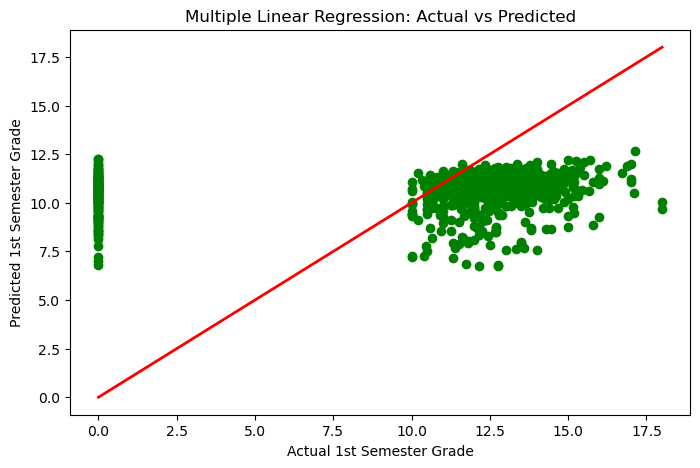

In [9]:

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. LOAD DATA
# -------------------------------
df = pd.read_csv("data.csv", sep=";")

# Fill numeric missing values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# -------------------------------
# 2. SIMPLE LINEAR REGRESSION
# -------------------------------
# Predict "Curricular units 1st sem (grade)" using "Admission grade"

X_simple = df[['Admission grade']]  # Independent variable
y_simple = df['Curricular units 1st sem (grade)']  # Dependent variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Train model
slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

# Predictions
y_pred_simple = slr_model.predict(X_test)

# Evaluate model
print("Simple Linear Regression:")
print("Slope:", slr_model.coef_[0])
print("Intercept:", slr_model.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred_simple))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_simple))

# Plot regression line
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.title("Simple Linear Regression: Admission Grade vs 1st Sem Grade")
plt.xlabel("Admission Grade")
plt.ylabel("1st Semester Grade")
plt.legend()
plt.show()

# -------------------------------
# 3. MULTIPLE LINEAR REGRESSION
# -------------------------------
# Predict "Curricular units 1st sem (grade)" using multiple features
features = ['Admission grade', 'Age at enrollment', 'GDP', 'Inflation rate', 'Unemployment rate']

X_multi = df[features]
y_multi = df['Curricular units 1st sem (grade)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predictions
y_pred_multi = mlr_model.predict(X_test)

# Evaluate model
print("\nMultiple Linear Regression:")
print("Coefficients:", dict(zip(features, mlr_model.coef_)))
print("Intercept:", mlr_model.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred_multi))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_multi))

# Plot predicted vs actual
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_multi, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.xlabel("Actual 1st Semester Grade")
plt.ylabel("Predicted 1st Semester Grade")
plt.show()

## Q6. Develop Logistic Regression Model for any dataset.

Accuracy: 0.6610169491525424

Confusion Matrix:
[[529  40]
 [260  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       569
           1       0.58      0.18      0.27       316

    accuracy                           0.66       885
   macro avg       0.63      0.55      0.53       885
weighted avg       0.64      0.66      0.60       885



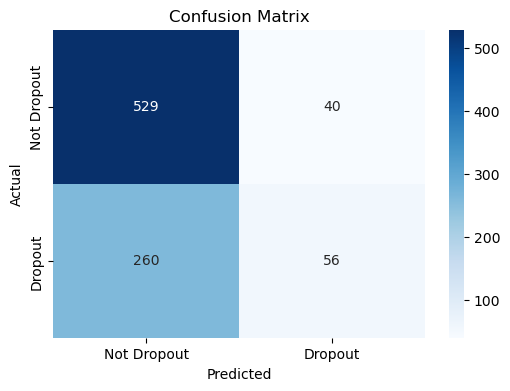

In [10]:

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. LOAD DATA
# -------------------------------
df = pd.read_csv("data.csv", sep=";")

# -------------------------------
# 2. PREPROCESS DATA
# -------------------------------
# Fill numeric missing values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Binary classification: Dropout = 1, others = 0
df['Dropout_flag'] = df['Target'].apply(lambda x: 1 if x=='Dropout' else 0)

# Select features for prediction
features = ['Admission grade', 'Age at enrollment', 'GDP', 'Inflation rate', 'Unemployment rate']
X = df[features]
y = df['Dropout_flag']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 3. SPLIT DATA
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -------------------------------
# 4. TRAIN LOGISTIC REGRESSION MODEL
# -------------------------------
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# -------------------------------
# 5. PREDICTIONS
# -------------------------------
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:,1]  # Probability of being Dropout

# -------------------------------
# 6. EVALUATION
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Dropout','Dropout'], yticklabels=['Not Dropout','Dropout'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## Q7. Develop Decision Tree Classification model for a given dataset anduse it to classify a new sample.

Accuracy: 0.5615819209039548

Confusion Matrix:
[[140 175   1]
 [ 60 357   1]
 [ 41 110   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.44      0.50       316
           1       0.56      0.85      0.67       418
           2       0.00      0.00      0.00       151

    accuracy                           0.56       885
   macro avg       0.38      0.43      0.39       885
weighted avg       0.47      0.56      0.50       885



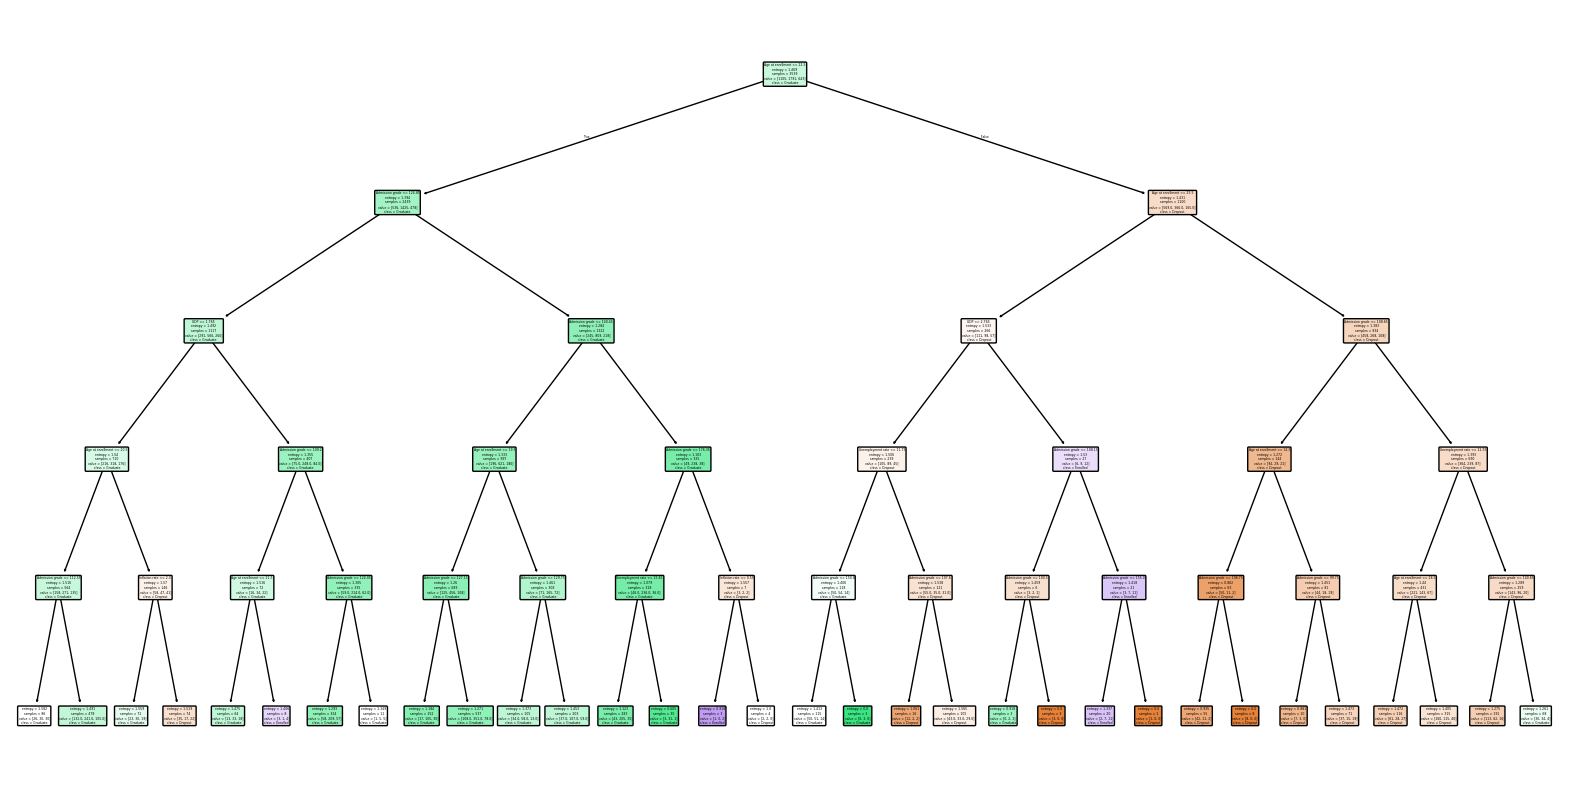


New student predicted class: Graduate


In [11]:

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# -------------------------------
# 1. LOAD DATA
# -------------------------------
df = pd.read_csv("data.csv", sep=";")

# -------------------------------
# 2. PREPROCESS DATA
# -------------------------------
# Fill missing numeric values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Encode target as numeric for classification
df['Target_encoded'] = df['Target'].map({'Dropout':0, 'Graduate':1, 'Enrolled':2})

# Select features (you can choose relevant ones)
features = ['Admission grade', 'Age at enrollment', 'GDP', 'Inflation rate', 'Unemployment rate']
X = df[features]
y = df['Target_encoded']

# -------------------------------
# 3. SPLIT DATA
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 4. TRAIN DECISION TREE MODEL
# -------------------------------
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# -------------------------------
# 5. PREDICTIONS & EVALUATION
# -------------------------------
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -------------------------------
# 6. VISUALIZE DECISION TREE
# -------------------------------
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=features, class_names=['Dropout','Graduate','Enrolled'], filled=True, rounded=True)
plt.show()

# -------------------------------
# 7. CLASSIFY NEW SAMPLE
# -------------------------------
# Example: new student
new_student = pd.DataFrame({
    'Admission grade': [128],
    'Age at enrollment': [19],
    'GDP': [10.8],
    'Inflation rate': [1.4],
    'Unemployment rate': [1.74]
})

prediction = dt_model.predict(new_student)
pred_class = {0:'Dropout', 1:'Graduate', 2:'Enrolled'}[prediction[0]]

print("\nNew student predicted class:", pred_class)

## Q8. Implement Naïve Bayes Classification in Python

Accuracy: 0.5310734463276836

Confusion Matrix:
[[ 90 226   0]
 [ 38 380   0]
 [ 16 135   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.28      0.39       316
           1       0.51      0.91      0.66       418
           2       0.00      0.00      0.00       151

    accuracy                           0.53       885
   macro avg       0.38      0.40      0.35       885
weighted avg       0.47      0.53      0.45       885



C:\Users\raiga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\raiga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\raiga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


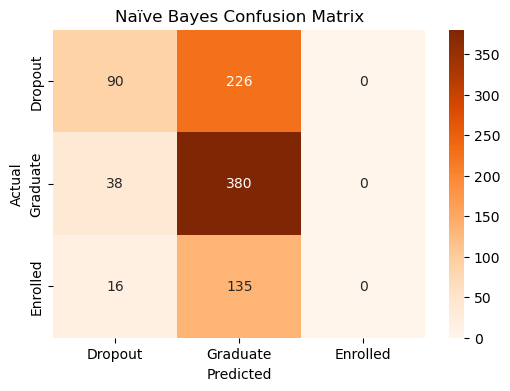


New student predicted class: Enrolled


In [12]:

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. LOAD DATA
# -------------------------------
df = pd.read_csv("data.csv", sep=";")

# -------------------------------
# 2. PREPROCESS DATA
# -------------------------------
# Fill missing numeric values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Encode target
df['Target_encoded'] = df['Target'].map({'Dropout':0, 'Graduate':1, 'Enrolled':2})

# Select numeric features for Naïve Bayes
features = ['Admission grade', 'Age at enrollment', 'GDP', 'Inflation rate', 'Unemployment rate']
X = df[features]
y = df['Target_encoded']

# Scale features (optional but recommended for GaussianNB)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 3. SPLIT DATA
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -------------------------------
# 4. TRAIN NAÏVE BAYES MODEL
# -------------------------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# -------------------------------
# 5. PREDICTIONS & EVALUATION
# -------------------------------
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=['Dropout','Graduate','Enrolled'], yticklabels=['Dropout','Graduate','Enrolled'])
plt.title("Naïve Bayes Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# -------------------------------
# 6. CLASSIFY NEW SAMPLE
# -------------------------------
# Example new student
new_student = pd.DataFrame({
    'Admission grade': [130],
    'Age at enrollment': [20],
    'GDP': [12.0],
    'Inflation rate': [2.0],
    'Unemployment rate': [1.5]
})

new_student_scaled = scaler.transform(new_student)
prediction = nb_model.predict(new_student_scaled)
pred_class = {0:'Dropout', 1:'Graduate', 2:'Enrolled'}[prediction[0]]

print("\nNew student predicted class:", pred_class)

## 9. Build KNN Classification model for a given dataset.Build Artificial Neural Network model with back propagation on a


KNN Accuracy: 0.48135593220338985

Confusion Matrix:
[[136 162  18]
 [122 278  18]
 [ 65  74  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.43      0.43       316
           1       0.54      0.67      0.60       418
           2       0.25      0.08      0.12       151

    accuracy                           0.48       885
   macro avg       0.40      0.39      0.38       885
weighted avg       0.45      0.48      0.45       885



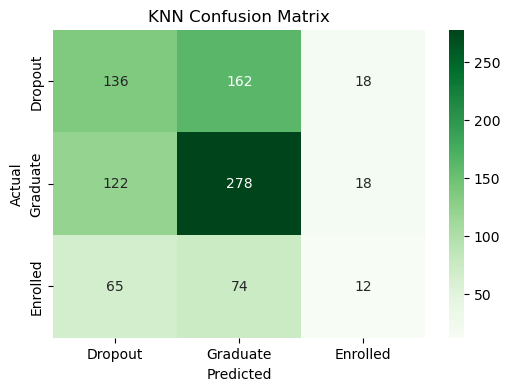

In [13]:
#given dataset.
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. LOAD DATA
# -------------------------------
df = pd.read_csv("data.csv", sep=";")

# -------------------------------
# 2. PREPROCESS DATA
# -------------------------------
# Fill missing numeric values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Encode target
df['Target_encoded'] = df['Target'].map({'Dropout':0, 'Graduate':1, 'Enrolled':2})

# Select features
features = ['Admission grade', 'Age at enrollment', 'GDP', 'Inflation rate', 'Unemployment rate']
X = df[features]
y = df['Target_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 3. SPLIT DATA
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -------------------------------
# 4. TRAIN KNN MODEL
# -------------------------------
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune k
knn_model.fit(X_train, y_train)

# -------------------------------
# 5. PREDICTIONS & EVALUATION
# -------------------------------
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Dropout','Graduate','Enrolled'], yticklabels=['Dropout','Graduate','Enrolled'])
plt.title("KNN Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

## 10. Implement Random forest ensemble method on a given dataset.

Random Forest Accuracy: 0.576271186440678

Confusion Matrix:
[[148   0 168]
 [ 45   0 106]
 [ 56   0 362]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.47      0.52       316
           1       0.00      0.00      0.00       151
           2       0.57      0.87      0.69       418

    accuracy                           0.58       885
   macro avg       0.39      0.44      0.40       885
weighted avg       0.48      0.58      0.51       885



C:\Users\raiga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\raiga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\raiga\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


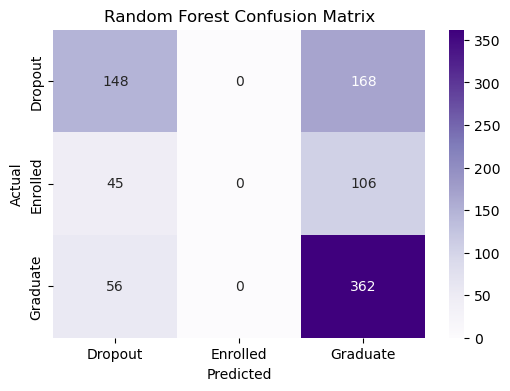

Predicted class for new student: Graduate


C:\Users\raiga\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# 1. LOAD DATA
# -------------------------------
df = pd.read_csv("data.csv", sep=";")

# -------------------------------
# 2. PREPROCESS DATA
# -------------------------------
# Fill missing numeric values
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Encode target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Target'])  # Dropout=0, Graduate=1, Enrolled=2

# Select features
features = ['Admission grade', 'Age at enrollment', 'GDP', 'Inflation rate', 'Unemployment rate']
X = df[features]

# Scale features (optional for Random Forest, but good practice)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 3. SPLIT DATA
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -------------------------------
# 4. TRAIN RANDOM FOREST MODEL
# -------------------------------
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# -------------------------------
# 5. PREDICTIONS & EVALUATION
# -------------------------------
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Random Forest Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# -------------------------------
# 6. CLASSIFY NEW SAMPLE
# -------------------------------
# Example new student
import numpy as np
new_student = np.array([[130, 20, 12.0, 2.0, 1.5]])
new_student_scaled = scaler.transform(new_student)
prediction = rf_model.predict(new_student_scaled)
pred_class = label_encoder.inverse_transform(prediction)

print("Predicted class for new student:", pred_class[0])

## Q11.Implement Boosting ensemble method on a given dataset.

In [19]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the dataset
# Your data uses ';' as delimiter
data = pd.read_csv('data.csv', delimiter=';')

# Step 3: Encode categorical columns
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Step 4: Separate features and target
X = data.drop('Target', axis=1)  # 'Target' is the label column
y = data['Target']

# Step 5: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Initialize AdaBoost with decision stump
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Step 7: Train the model
adaboost.fit(X_train, y_train)

# Step 8: Predict on test set
y_pred = adaboost.predict(X_test)

# Step 9: Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7311

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77       316
           1       0.44      0.26      0.33       151
           2       0.74      0.90      0.81       418

    accuracy                           0.73       885
   macro avg       0.66      0.63      0.64       885
weighted avg       0.71      0.73      0.71       885



## Q12Write a python program to implement K-Means clustering Algorithm.

Cluster Centers (scaled features):
[[-5.20286027e-02 -1.34614853e-01  7.07591573e-02  2.28645508e-01
   7.20127253e-02 -4.75339998e-02  4.80777891e-03  1.06194086e-03
  -2.82636074e-02 -1.47046382e-02 -1.53933632e-02 -1.08705353e-02
  -9.30009585e-03  6.60877183e-02  5.62571557e-03 -7.16150914e-02
   1.48346350e-01 -1.07927281e-01  1.16991204e-01 -1.59039282e-01
  -5.28194874e-06 -2.13712105e-01 -4.08791716e-02  6.04980049e-02
   1.72255334e-01  4.29373122e-01 -7.41778556e-02 -2.04043791e-01
   6.82087343e-03  1.45347925e-01  2.15732185e-01  4.35619166e-01
  -6.38636395e-02  6.82720288e-03 -2.98354019e-02  2.84469567e-02]
 [ 2.04596463e-01  8.24401710e-01 -4.53833183e-01 -4.21681620e-01
  -5.51403793e-01  4.93862164e-01 -4.92082167e-02 -1.40865979e-02
   1.51253724e-01  1.25178692e-01  5.68511512e-02  3.36592386e-02
   1.56684994e-01 -3.15305915e-01 -1.07992936e-01  1.01464982e-01
   4.98032739e-02  1.61520383e-02 -3.03127565e-01  7.20235002e-01
   2.31541648e-02  3.36911982e+00  2.789

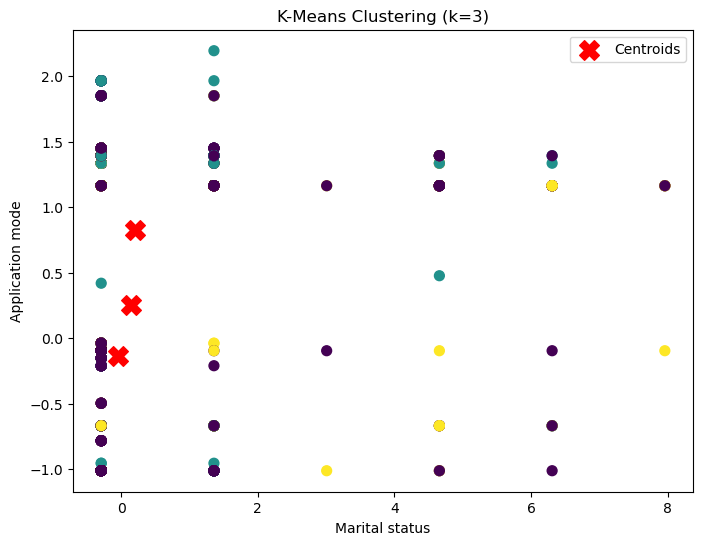

In [21]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 2: Load the dataset
# Replace 'student_data.csv' with your file path
data = pd.read_csv('data.csv', delimiter=';')

# Step 3: Select numeric features for clustering
# You can choose relevant features; here we use all numeric columns
X = data.select_dtypes(include='number')

# Step 4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Choose number of clusters (k)
k = 3  # You can change this based on your data

# Step 6: Initialize and fit KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Step 7: Get cluster labels
labels = kmeans.labels_
data['Cluster'] = labels  # Add cluster labels to original data

# Step 8: Print cluster centers
print("Cluster Centers (scaled features):")
print(kmeans.cluster_centers_)

# Step 9: Optional: Visualize clusters (using first two features)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', marker='X', s=200, label='Centroids')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title(f'K-Means Clustering (k={k})')
plt.legend()
plt.show()